In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("spam.csv", encoding="latin1")
df = df.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["label","message"]
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
#data cleaning and text pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
stopwordslist = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'nor',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'won',
 "won't",]

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
corpus=[]
for i in range (0,len(df)):
  review = re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwordslist]
  review = ' '.join(review)
  corpus.append(review)

In [60]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl 3 week no word back like fun still tb ok xxx std chg send 1 50 rcv',
 'even brother not like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'winner valu network custom select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6day 16 tsandc appli repli hl 4 info',
 'urgent 1 week f

# train test split

In [61]:
#independent features and dependent features
y = pd.get_dummies(df['label'],drop_first= True)
y

,spam
0,False
1,False
2,True
3,False
4,False
...,...
5567,True
5568,False
5569,False
5570,False


In [62]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(corpus, y, test_size = 0.2, random_state = 0)

In [63]:
x_train

['no no kalli home ground amla home town durban',
 'escap theatr go watch kavalan minut',
 'walk mom right stagwood pass right winterston left victor hill address lt gt',
 'dunno close oredi not v ma fan',
 'yo im right yo work',
 'ur luck love someon ur fortun love one love u',
 'also know lunch menu da know',
 'oh yeah diet flew window',
 'nah straight bring bud drink someth actual littl use straight cash',
 'splashmobil choos 1000 gr8 tone wk subscrit servic weekli tone cost 300p u one credit kick back enjoy',
 'fight world easi u either win lose bt fightng some1 close u dificult u lose u lose u win u still lose',
 'co lar not ba dao ok 1 pm lor u never ask go ah said u would ask fri said u ask today',
 'hey around got enough half ten owe',
 'ask anthoni dad bf',
 'ok sent u da latest version da project',
 'place man',
 'gd luck 4 ur exam',
 'burger king wanna play footi top stadium get 2 burger king 1st sept go larg super coca cola walk winner',
 'e best 4 ur exam later',
 '5p 4 al

In [64]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


data seems to be imbalanced

# creating BOW

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,ngram_range=(1,2))
x_train = cv.fit_transform(x_train).toarray()

In [70]:
x_test = cv.transform(x_test).toarray()

In [71]:
x_train.shape

(4457, 2500)

In [72]:
y_train.shape

(4457, 1)

In [73]:
cv.vocabulary_

{'no': 1481,
 'kalli': 1137,
 'home': 1035,
 'town': 2204,
 'theatr': 2135,
 'go': 900,
 'watch': 2365,
 'minut': 1373,
 'go watch': 914,
 'walk': 2342,
 'mom': 1407,
 'right': 1810,
 'pass': 1611,
 'left': 1205,
 'address': 169,
 'lt': 1286,
 'gt': 950,
 'lt gt': 1288,
 'dunno': 706,
 'close': 484,
 'oredi': 1586,
 'not': 1512,
 'ma': 1303,
 'yo': 2491,
 'im': 1075,
 'work': 2443,
 'ur': 2265,
 'luck': 1292,
 'love': 1272,
 'someon': 1966,
 'one': 1566,
 'love someon': 1280,
 'also': 199,
 'know': 1160,
 'lunch': 1296,
 'menu': 1353,
 'da': 594,
 'oh': 1546,
 'yeah': 2483,
 'diet': 653,
 'nah': 1447,
 'straight': 2039,
 'bring': 353,
 'bud': 363,
 'drink': 695,
 'someth': 1968,
 'actual': 165,
 'littl': 1237,
 'use': 2291,
 'cash': 426,
 'choos': 467,
 '1000': 33,
 'gr8': 939,
 'tone': 2186,
 'wk': 2432,
 'servic': 1898,
 'weekli': 2386,
 'cost': 551,
 'credit': 570,
 'kick': 1148,
 'back': 282,
 'enjoy': 735,
 'fight': 800,
 'world': 2446,
 'easi': 713,
 'either': 722,
 'win': 2417,


In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier().fit(x_train,y_train)

In [79]:
y_pred = classifier.predict(x_test)

In [82]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [80]:
accuracy_score(y_test,y_pred)

0.979372197309417

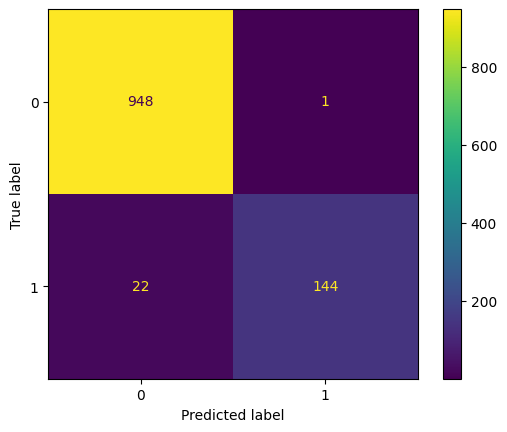

In [85]:
conmat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conmat)
disp.plot()
plt.show()

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       949
        True       0.99      0.87      0.93       166

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



why did we use random forest?
because random forest is not impacted by outliers.

end